## Similarity-based querying of synapses using SynapseCLR representations

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

from synapse_utils import io

SMALL_SIZE = 10
MEDIUM_SIZE = 12
BIGGER_SIZE = 14

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [2]:
repo_root = '../..'
checkpoint_path = '../../output/checkpoint__synapseclr__so3__second_stage'
dataset_path = '../../data/MICrONS__L23__8_8_40__processed'

reload_epoch = 99
node_idx_list = [0, 1, 2, 3]
contamination_indices_path = None

In [3]:
# load features
load_prefix = 'encoder.fc'
save_prefix = load_prefix.replace('.', '_')
l2_normalize = False

features_nf, meta_df, meta_ext_df = io.load_features(
    checkpoint_path,
    node_idx_list,
    reload_epoch,
    feature_hook=load_prefix,
    dataset_path=dataset_path,
    l2_normalize=l2_normalize,
    contamination_indices_path=contamination_indices_path)

## Query synapse IDs

In [4]:
synapse_ids = [
    1317707,
    2341444,
    854689,
    155308,
    828459,
    1726363,
    2825002,
    1615486,
    1924577
]

top_k = 7
max_dist = 12
bins = 100

## Generate 3D renders of nearest neighbor synapses

In [6]:
from synapse_utils import vis

ctx = vis.SynapseVisContext(
    dataset_path,
    '../../configs/config__synapseclr__so3__second_stage/augmenter_display.yaml',
    meta_df_override=meta_df,
    device='cuda')

In [152]:
for synapse_id in synapse_ids:

    synapse_index = {
        _synapse_id: _idx for _idx, _synapse_id in enumerate(meta_df['synapse_id'].values)}[synapse_id]

    dist_n = np.linalg.norm(features_nf - features_nf[synapse_index][None], axis=1)
    sorted_dist_n = sorted(dist_n)[1:]    
    distances_k = [0] + sorted_dist_n[:top_k]
    vis_indices_k = np.argsort(dist_n)[:(top_k + 1)]

    for i, vis_synapse_index in enumerate(vis_indices_k):
        vis_synapse_id = meta_df.iloc[vis_synapse_index].synapse_id
        print(f'{synapse_id}, {vis_synapse_id} ...')
        output_filename = os.path.join(
            './output/knn_demo/elements', f'query__{synapse_id}__{i}__{vis_synapse_id}.png')
        if os.path.exists(output_filename):
            continue
        fig = vis.make_3d_synapse_figure(
            ctx,
            vis_synapse_index,
            view_plane=2,
            surface_point_cloud_opacity=0.06);
        fig.write_image(output_filename)

1317707, 1317707 ...
1317707, 3512143 ...
1317707, 643158 ...
1317707, 184120 ...
1317707, 3263034 ...
1317707, 900155 ...
1317707, 929555 ...
1317707, 3350208 ...
2341444, 2341444 ...
2341444, 1566653 ...
2341444, 2137707 ...
2341444, 3383144 ...
2341444, 3223401 ...
2341444, 938471 ...
2341444, 2468059 ...
2341444, 3478209 ...
854689, 854689 ...
854689, 2800443 ...
854689, 2780733 ...
854689, 2743348 ...
854689, 2278427 ...
854689, 2897196 ...
854689, 2779217 ...
854689, 3447213 ...
155308, 155308 ...
155308, 3553835 ...
155308, 483621 ...
155308, 94703 ...
155308, 87124 ...
155308, 426161 ...
155308, 256915 ...
155308, 152666 ...
828459, 828459 ...
828459, 424170 ...
828459, 34257 ...
828459, 2853959 ...
828459, 3386367 ...
828459, 3049041 ...
828459, 1227129 ...
828459, 3125592 ...
1726363, 1726363 ...
1726363, 3068846 ...
1726363, 1887997 ...
1726363, 1445824 ...
1726363, 1948417 ...
1726363, 1680679 ...
1726363, 669305 ...
1726363, 1953027 ...
2825002, 2825002 ...
2825002, 281866

## Make a tile plot

In [7]:
import matplotlib.image as img
from matplotlib.gridspec import GridSpec

In [8]:
suffix = 'large'
synapse_ids = [
    1317707,
    155308,
    1615486,
    828459,
    1924577,
    2341444,
    1726363,
    854689,
    2825002,
]

# suffix = 'small'
# synapse_ids = [
#     1317707,
#     1924577,
#     2341444,
# ]

In [9]:
SMALL_SIZE = 20
MEDIUM_SIZE = 24
BIGGER_SIZE = 28

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

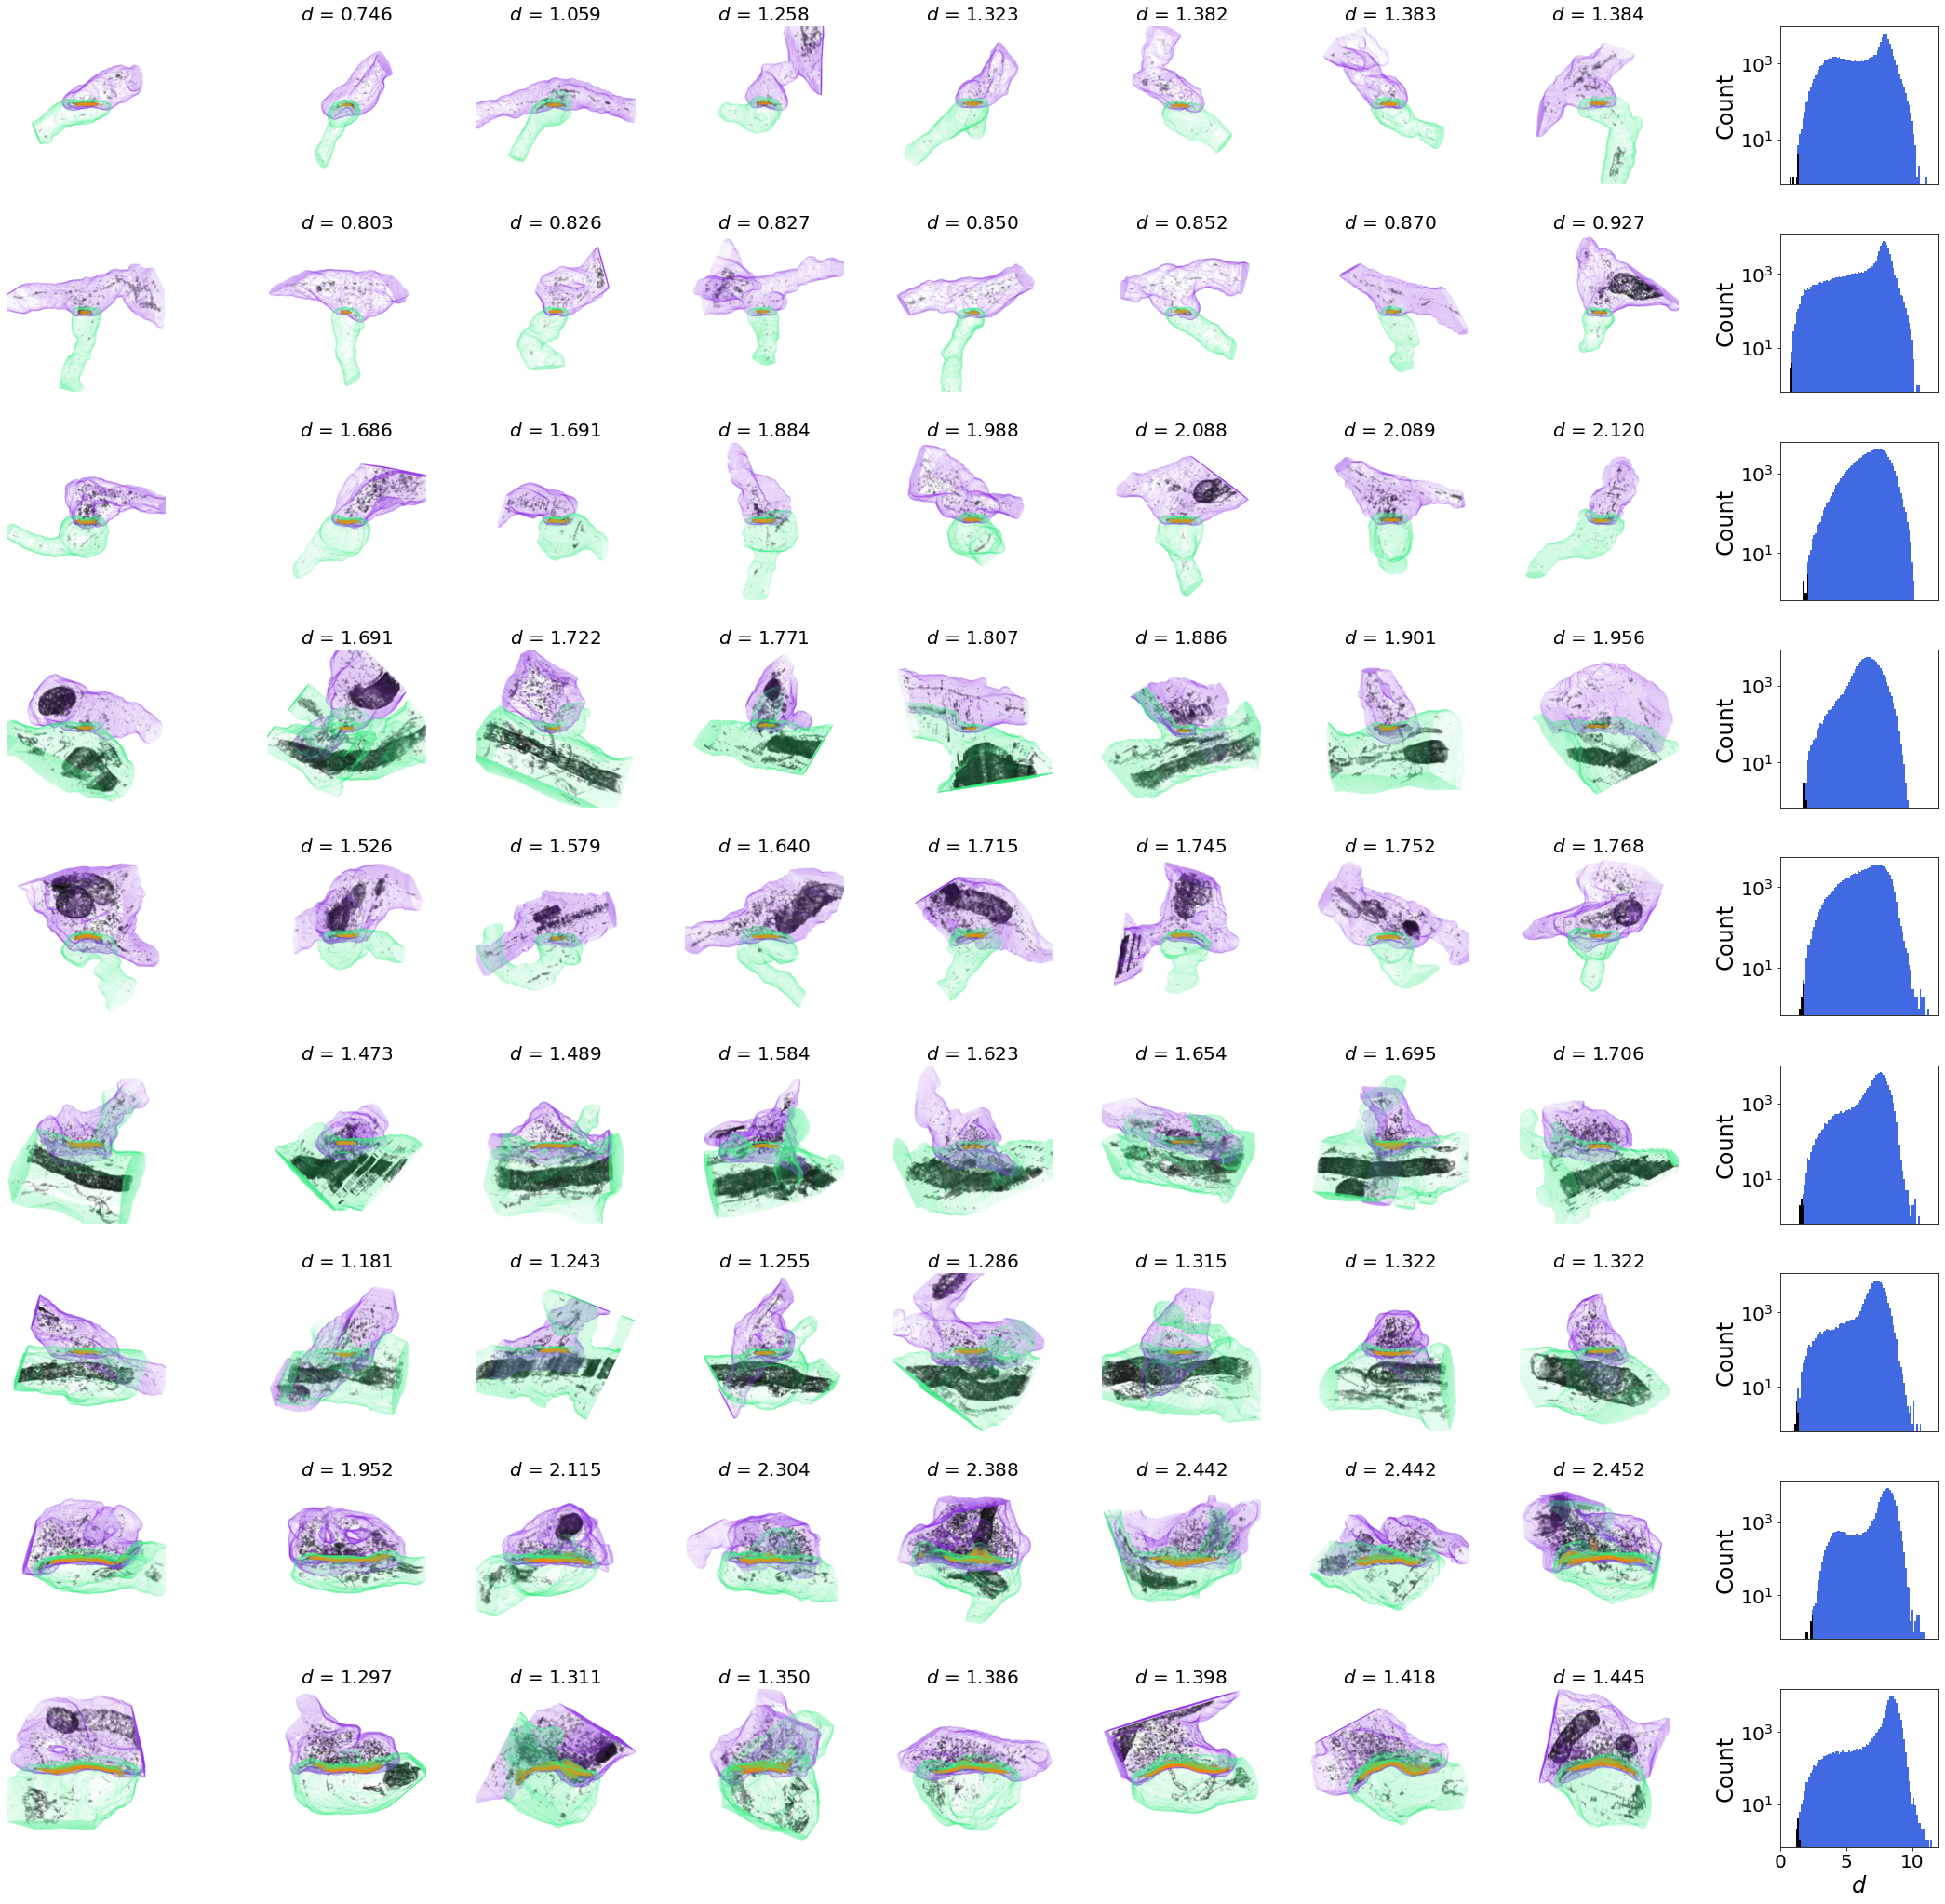

In [10]:
s = 4
scale = 1.
margin_cut = 0

ncols = s * (top_k + 2) + 2
nrows = s * len(synapse_ids)

pad = 0
fig = plt.figure(figsize=(scale * ncols, scale * nrows + pad))
gs = GridSpec(nrows, ncols, figure=fig)

for i in range(len(synapse_ids)):
    
    # build axes
    a = s * i
    ax_source = fig.add_subplot(gs[a:(a + s), 0:s])
    ax_top_k_list = [
        fig.add_subplot(gs[a:(a + s), (s + 1 + j * s):(s + 1 + j * s + s)])
        for j in range(top_k)]
    ax_dist = fig.add_subplot(gs[a:(a + s), (ncols - s):])
    
    ax_source.axis('off')
    for ax in ax_top_k_list:
        ax.axis('off')

    synapse_id = synapse_ids[i]
    synapse_index = {
        _synapse_id: _idx for _idx, _synapse_id in enumerate(meta_df['synapse_id'].values)}[synapse_id]
    dist_n = np.linalg.norm(features_nf - features_nf[synapse_index][None], axis=1)
    sorted_dist_n = sorted(dist_n)[1:]
    distances_k = sorted_dist_n[:top_k]
    target_synapse_indices_k = np.argsort(dist_n)[:(top_k + 1)][1:]
    
    # the distribution
    ax_dist.hist(sorted_dist_n, bins=bins, log=True, range=(0, max_dist), color='royalblue')
    ax_dist.hist(sorted_dist_n[:top_k], bins=bins, log=True, range=(0, max_dist), color='black')
    ax_dist.set_xlim((0, max_dist))
    ax_dist.set_ylabel('Count')
    ax_dist.set_xlabel('$d$')
    ax_dist.set_box_aspect(1.)
    ax_dist.set_xticks([0, 5, 10])
    if i != (len(synapse_ids) - 1):
        ax_dist.set_xticks([])
        ax_dist.set_xlabel(None)

    # source
    source_image = img.imread(os.path.join(
        '../../output/analysis/knn_demo/elements', f'query__{synapse_id}__0__{synapse_id}.png'))
    ax_source.imshow(source_image[
        margin_cut:source_image.shape[0] - margin_cut,
        margin_cut:source_image.shape[1] - margin_cut])

    # top-k
    for k, ax in enumerate(ax_top_k_list):
        target_synapse_index = target_synapse_indices_k[k]
        target_synapse_id = meta_df.iloc[target_synapse_index].synapse_id
        target_image = img.imread(os.path.join(
            '../../output/analysis/knn_demo/elements', f'query__{synapse_id}__{k + 1}__{target_synapse_id}.png'))
        ax.imshow(target_image[
            margin_cut:target_image.shape[0] - margin_cut,
            margin_cut:target_image.shape[1] - margin_cut])

        ax.set_title(f'$d$ = {sorted_dist_n[k]:.3f}')
    
plt.subplots_adjust(wspace=None, hspace=20.)

fig.savefig(f'../../output/analysis/knn_demo/synapse_simclr_knn_demo_{suffix}.pdf', dpi=150, bbox_inches='tight')